In [46]:
%matplotlib inline
import sys, scipy, os, warnings, librosa, argparse, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction import image
import scipy.io.wavfile as wav

sys.path.append('../src')
import laplacian, gradient, plotGraph, librosaF, qUpdate
import RecurrenceMatrix as RM

In [48]:
soundRecords = pickle.load(open( "../data/soundRecords_workII.json", "rb" ))
Q_init = np.random.rand(84) + 1e-7 #84 is cqt number of bins
Q = np.load("./Q/qTestIII_Alpha50_0/qTestIII_Alpha50_0_step39.npy")

In [49]:
sKey = soundRecords.keys()[1]
print "SALAMI ID: ", sKey
cqt_med = soundRecords[sKey]["cqt_med"]
gm0 = RM.featureQ2GaussianMatrix(cqt_med, Q_init) 
gm = RM.featureQ2GaussianMatrix(cqt_med, Q) #(nSample, nFeature)
L = scipy.sparse.csgraph.laplacian(gm, normed=True)
m_true = soundRecords[sKey]["m_true"]
L_true = soundRecords[sKey]["L_true"]

SALAMI ID:  1130


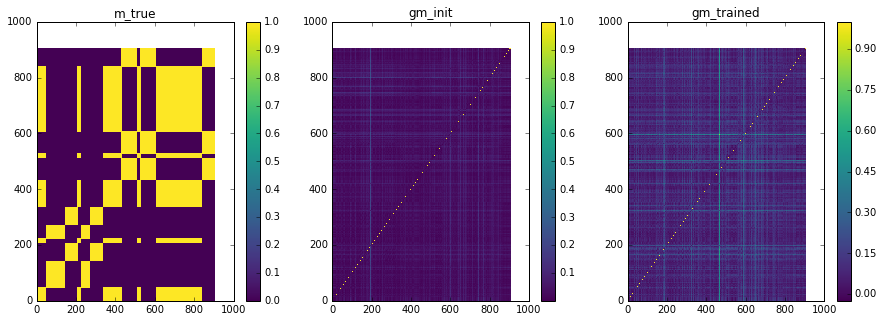

In [55]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pcolor(m_true, cmap="viridis")
plt.colorbar()
plt.title("m_true")

plt.subplot(1, 3, 2)
plt.pcolor(gm0, cmap="viridis")
plt.colorbar()
plt.title("gm_init")

plt.subplot(1, 3, 3)
plt.pcolor(gm, cmap="viridis")
plt.colorbar()
plt.title("gm_trained")

plt.show()

In [56]:
#Get Laplacian matrix and get top10 eigen vectors
Y_true = laplacian.getNormLaplacian(m_true, 3)
Y = laplacian.getNormLaplacian(gm, 3)

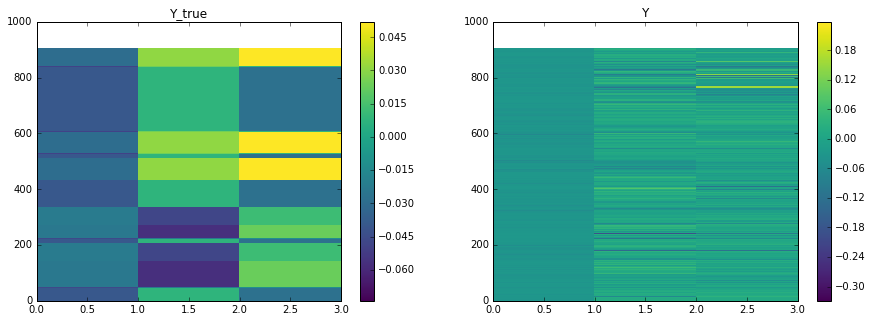

In [57]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pcolor(Y_true, cmap="viridis")
plt.colorbar()
plt.title("Y_true")

plt.subplot(1, 2, 2)
plt.pcolor(Y, cmap="viridis")
plt.colorbar()
plt.title("Y")

plt.show()

In [58]:
def boundaryDetection(Y, nCluster):
    row_leng = np.linalg.norm(Y, axis=1) #get length of each row
    row_leng[row_leng==0] = 1 #replace the legth of 0 to 1
    Y_norm = Y / row_leng[:, np.newaxis]

    clf = KMeans(n_clusters=nCluster, max_iter=1000).fit(Y_norm)
    centroids, labels = clf.cluster_centers_, clf.labels_

    boundary = []
    for idx in xrange(len(labels)-1):
        if labels[idx] != labels[idx+1]:
            boundary += [idx]
    
    return boundary, centroids

nCluster = 2
b_true, c_true = boundaryDetection(Y_true, nCluster)
b, c = boundaryDetection(Y, nCluster)

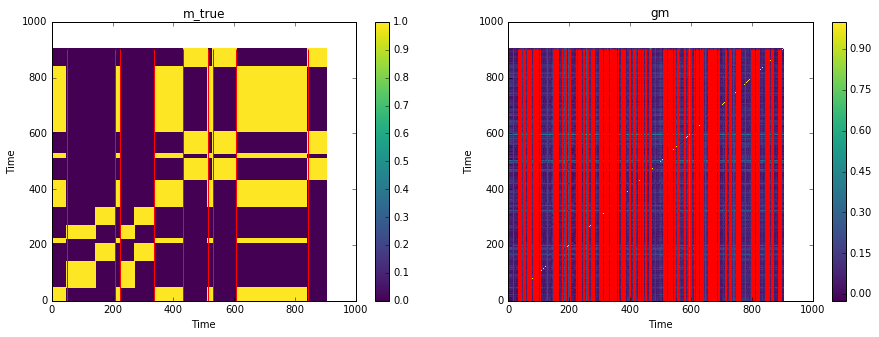

In [59]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pcolor(m_true, cmap="viridis")
plt.colorbar()
plt.vlines(b_true, 0, m_true.shape[0], color='r')
plt.title('m_true')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(1, 2, 2)
plt.pcolor(gm, cmap="viridis")
plt.colorbar()
plt.vlines(b, 0, m_true.shape[0], color='r')
plt.title('gm')
plt.xlabel('Time')
plt.ylabel('Time')

plt.show()